In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### read Q1 clean dataset

In [3]:
df = pd.read_csv('cleanQ1.csv')

### correlation

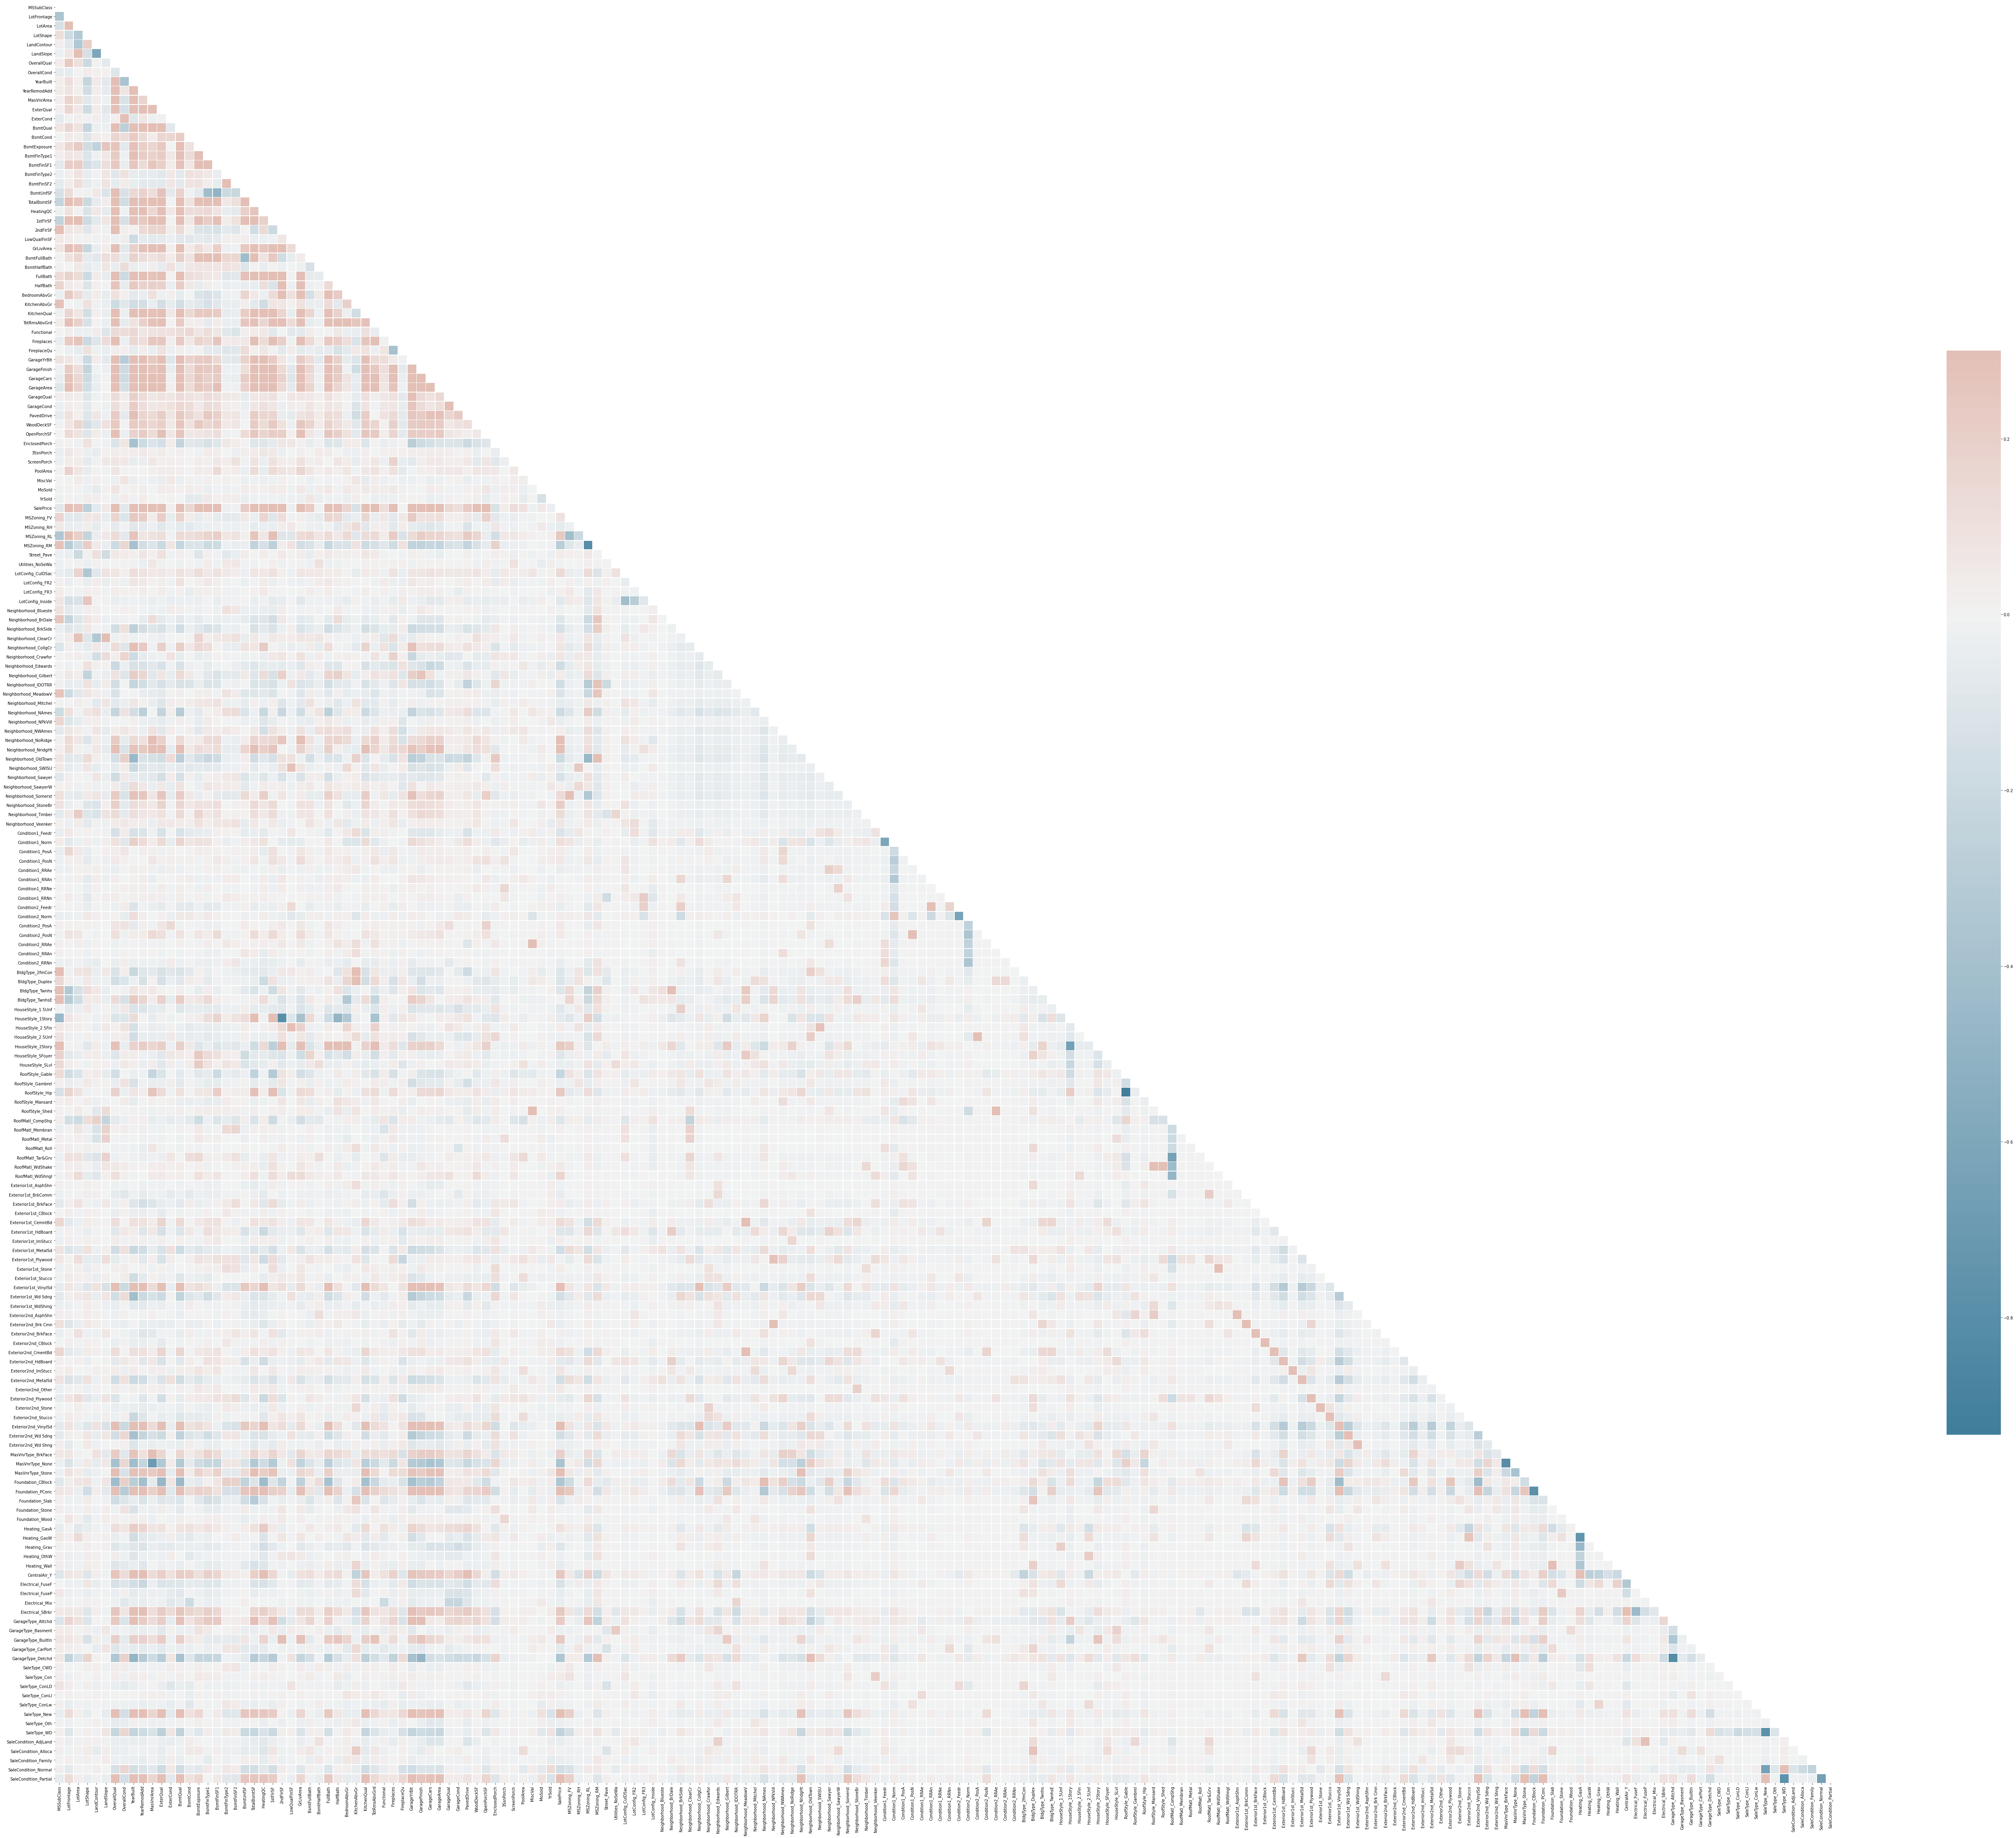

In [4]:
corr = df.corr()
# Set up the matplotlib figure
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(100, 100))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### feature importance

In [5]:
y = df['SalePrice'].values.reshape(-1,1)
X = df.drop(columns=['SalePrice'], axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X[X.columns] = ss.fit_transform(X[X.columns])

Feature: 0 = MSSubClass, Score: -5041.47189
Feature: 1 = LotFrontage, Score: 2081.65915
Feature: 2 = LotArea, Score: 4470.89983
Feature: 3 = LotShape, Score: 95.21341
Feature: 4 = LandContour, Score: 468.11561
Feature: 5 = LandSlope, Score: -349.97316
Feature: 6 = OverallQual, Score: 11018.47218
Feature: 7 = OverallCond, Score: 5633.25658
Feature: 8 = YearBuilt, Score: 6123.53802
Feature: 9 = YearRemodAdd, Score: 529.17658
Feature: 10 = MasVnrArea, Score: 5909.21174
Feature: 11 = ExterQual, Score: 2647.17284
Feature: 12 = ExterCond, Score: -1142.00505
Feature: 13 = BsmtQual, Score: 4307.90376
Feature: 14 = BsmtCond, Score: -313.43662
Feature: 15 = BsmtExposure, Score: 5820.59926
Feature: 16 = BsmtFinType1, Score: -40.51980
Feature: 17 = BsmtFinSF1, Score: -4034423035051710.50000
Feature: 18 = BsmtFinType2, Score: 997.69257
Feature: 19 = BsmtFinSF2, Score: -1426952235230661.50000
Feature: 20 = BsmtUnfSF, Score: -3908541295529801.50000
Feature: 21 = TotalBsmtSF, Score: 3880575038897857.0

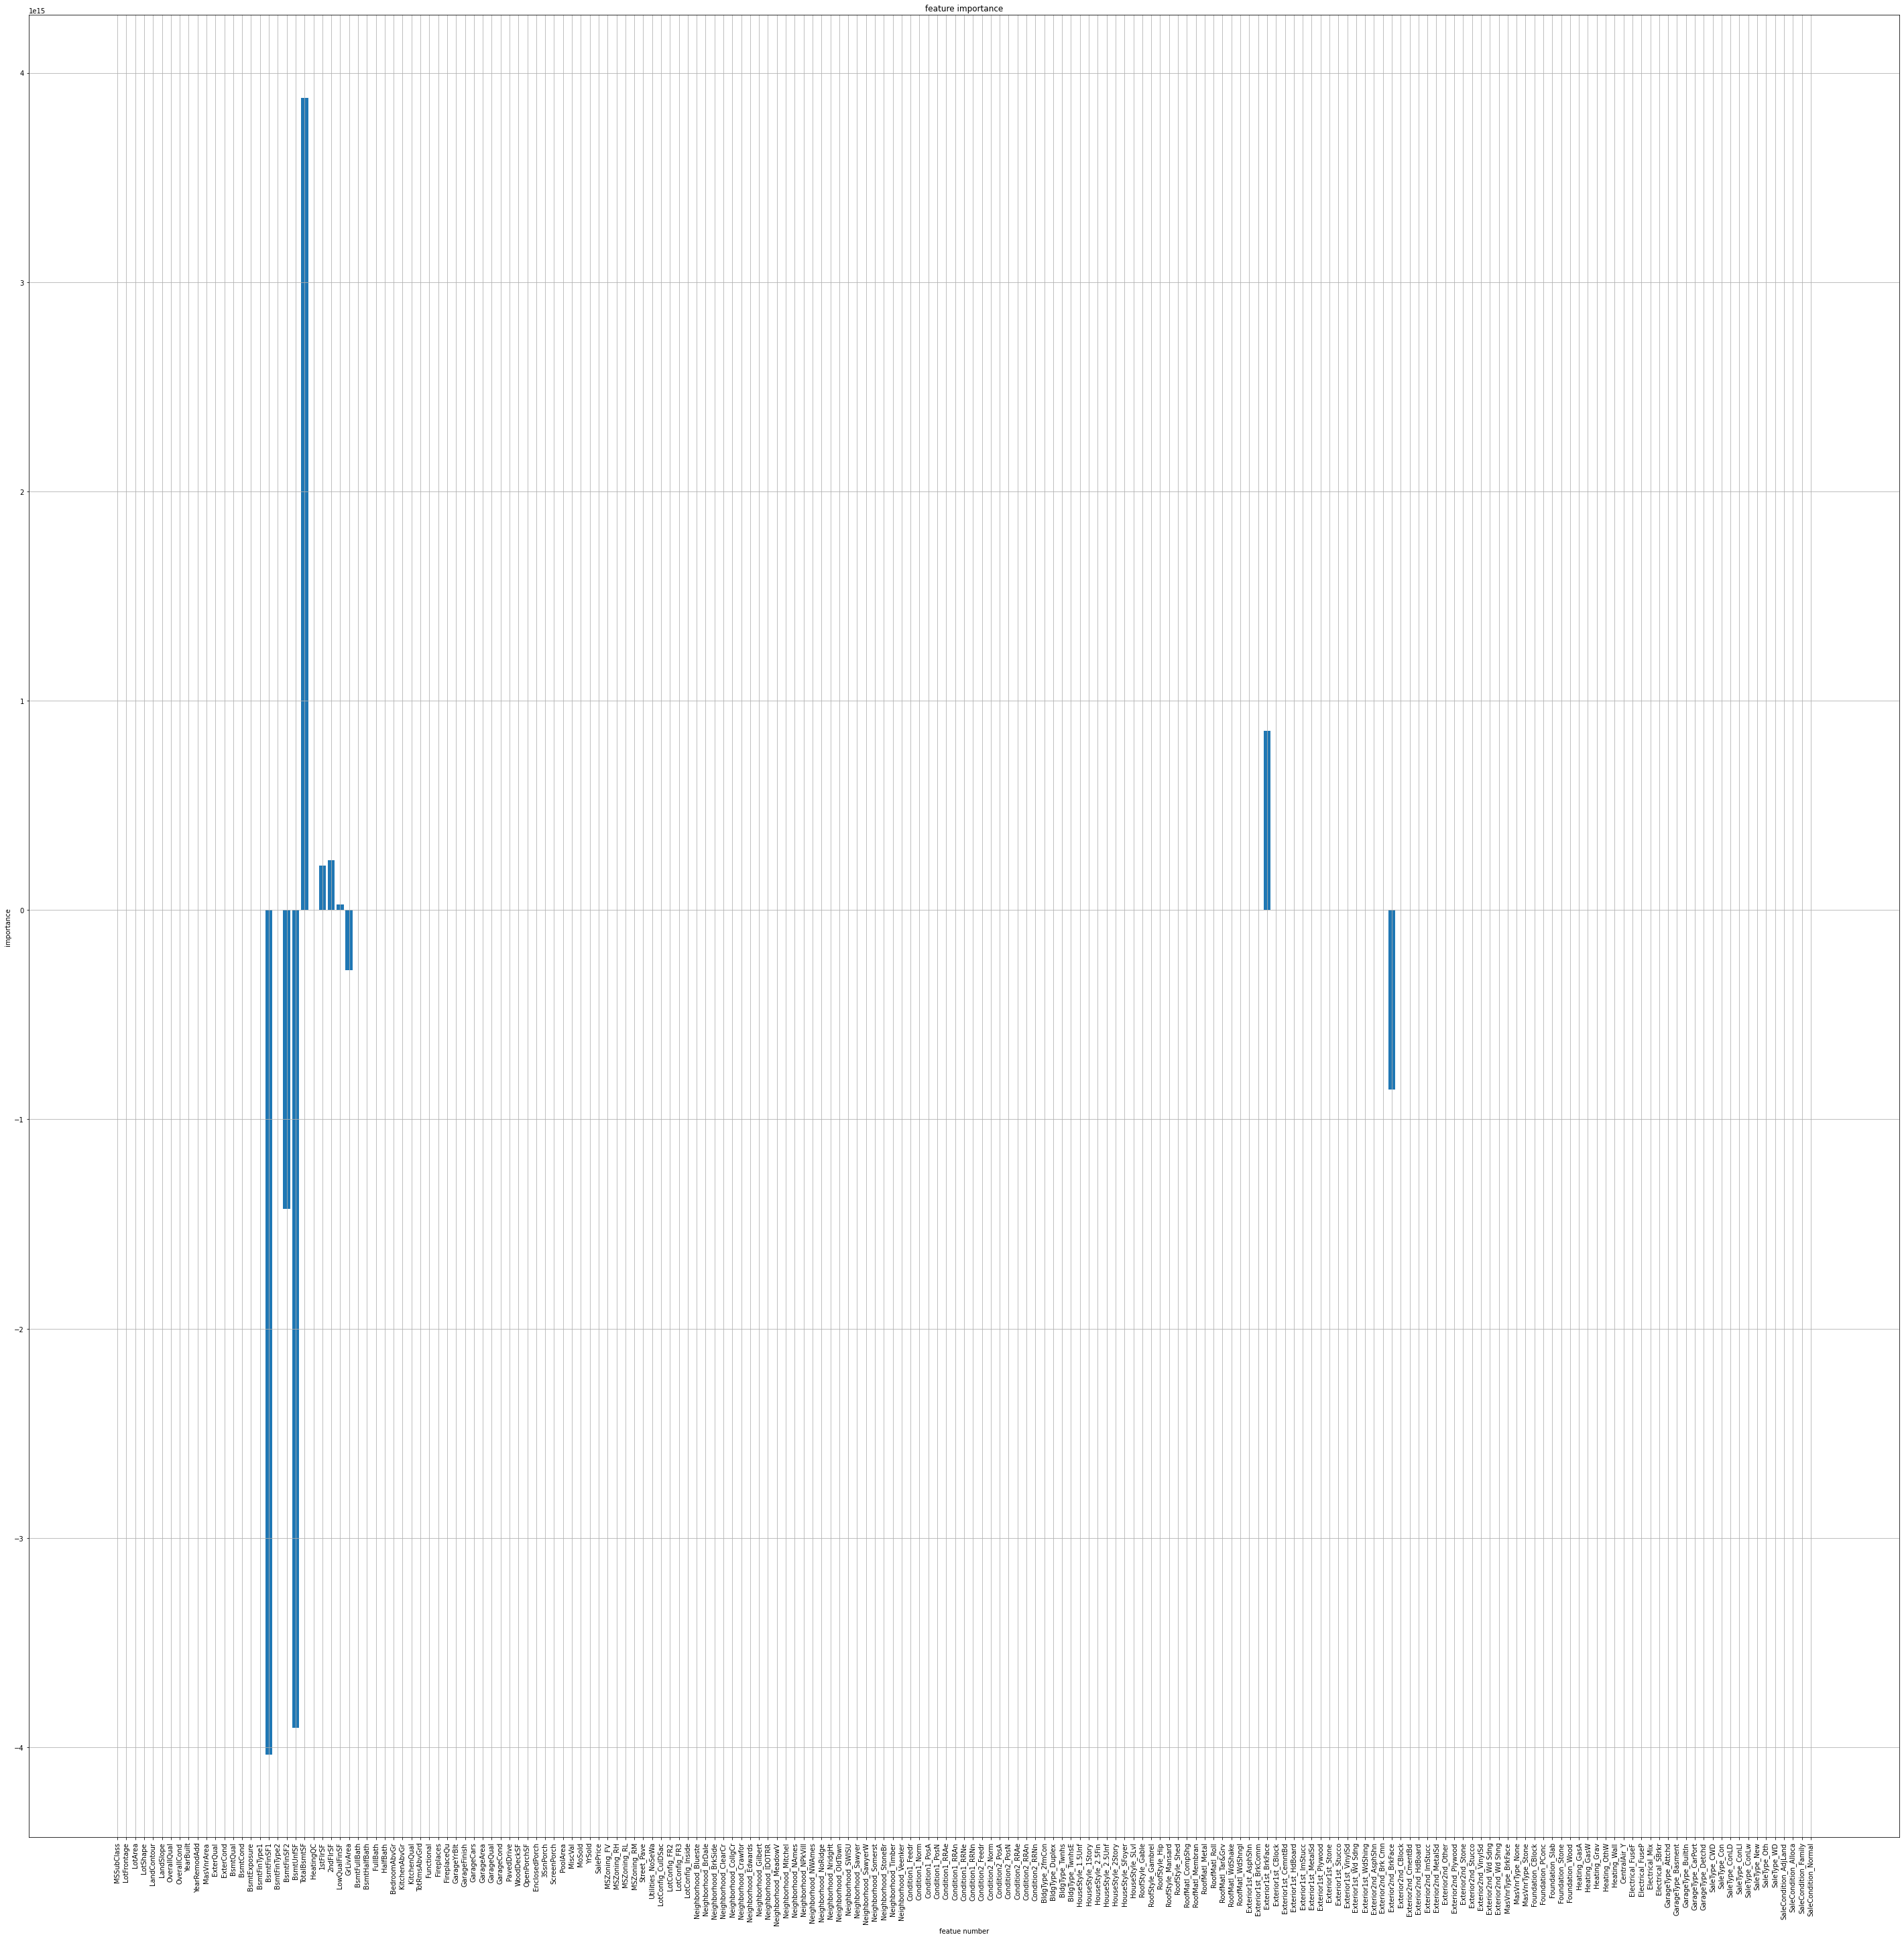

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d = %s, Score: %.5f' % (i,df.columns[i],v))
# plot feature importance
f, ax = plt.subplots(figsize=(50, 50))
plt.bar([df.columns[x] for x in range(len(importance))], importance)
plt.title('feature importance')
plt.xlabel('featue number')
plt.xticks(rotation='vertical')
plt.ylabel('importance')
plt.grid()
plt.show()

Feature: 0, Score: 0.00036
Feature: 1, Score: 0.01197
Feature: 2, Score: 0.00687
Feature: 3, Score: 0.00039
Feature: 4, Score: 0.00005
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.63563
Feature: 7, Score: 0.00286
Feature: 8, Score: 0.01435
Feature: 9, Score: 0.00456
Feature: 10, Score: 0.00232
Feature: 11, Score: 0.00261
Feature: 12, Score: 0.00067
Feature: 13, Score: 0.00084
Feature: 14, Score: 0.00004
Feature: 15, Score: 0.00278
Feature: 16, Score: 0.00210
Feature: 17, Score: 0.02252
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00029
Feature: 20, Score: 0.00702
Feature: 21, Score: 0.03012
Feature: 22, Score: 0.00097
Feature: 23, Score: 0.01822
Feature: 24, Score: 0.03668
Feature: 25, Score: 0.00020
Feature: 26, Score: 0.09722
Feature: 27, Score: 0.00059
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00238
Feature: 30, Score: 0.00043
Feature: 31, Score: 0.00015
Feature: 32, Score: 0.00580
Feature: 33, Score: 0.00252
Feature: 34, Score: 0.00180
Feature: 35, Score: 0.00079
Fe

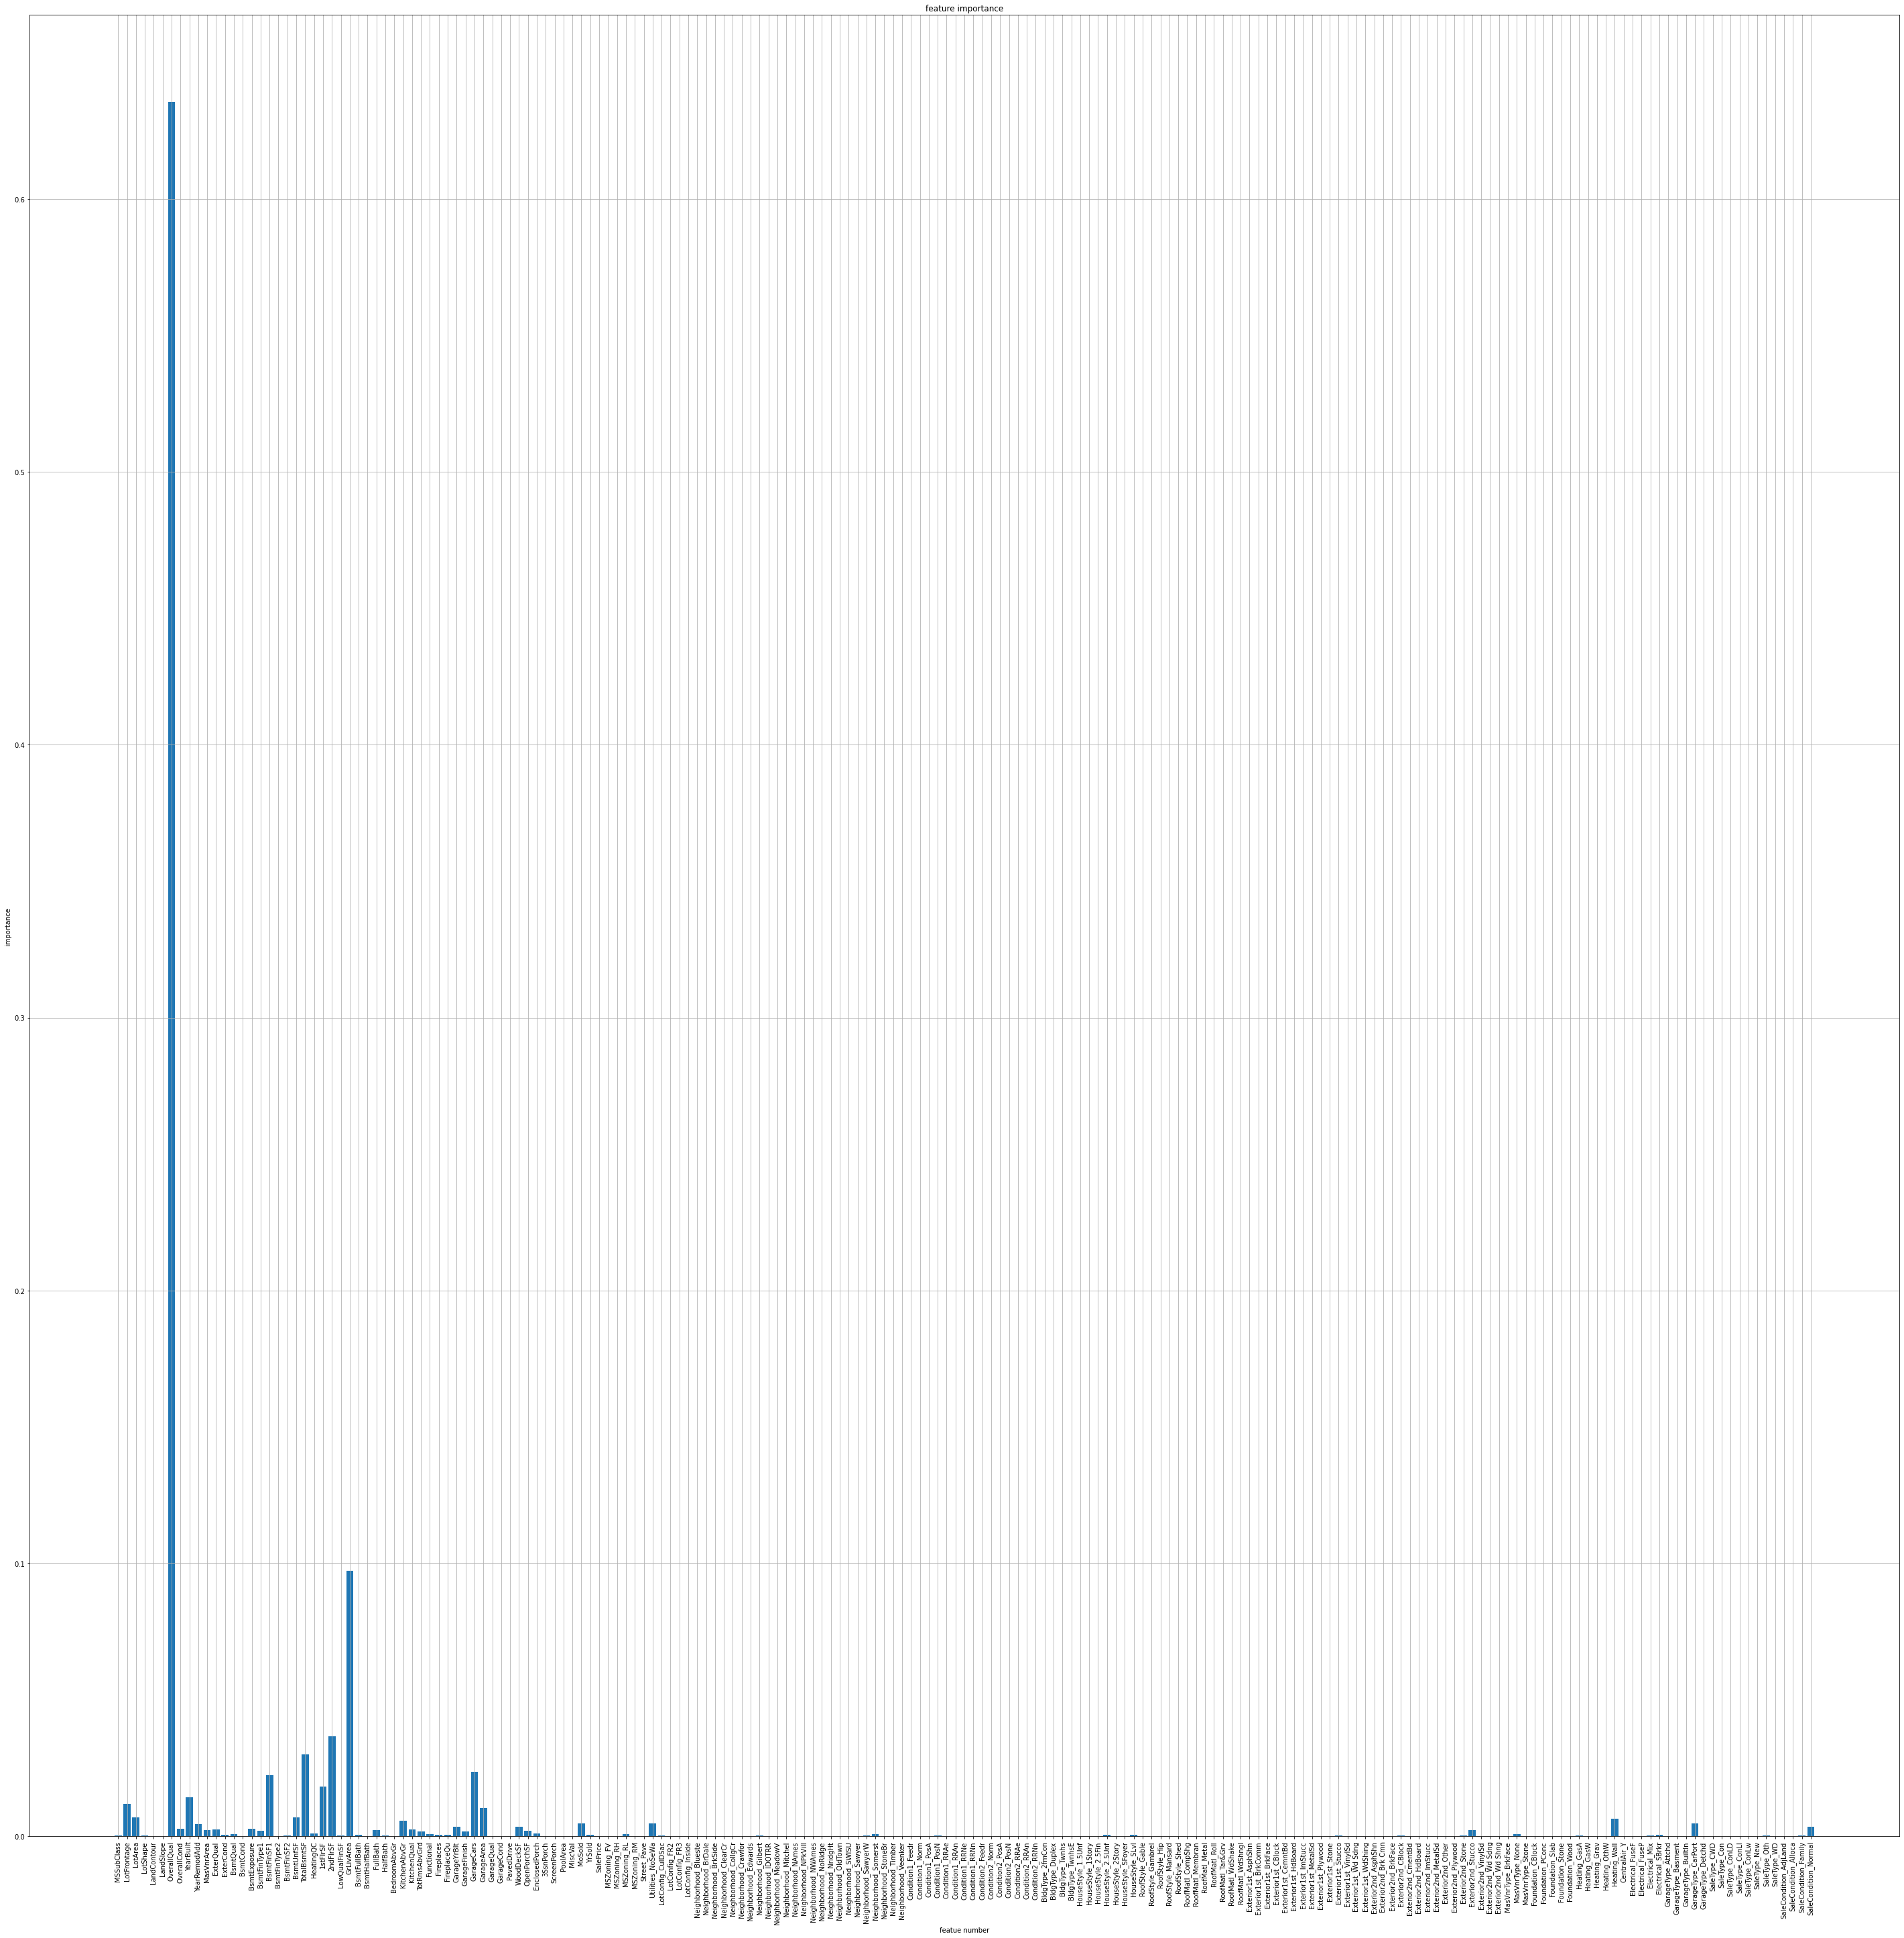

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
f, ax = plt.subplots(figsize=(50, 50))
plt.bar([df.columns[x] for x in range(len(importance))], importance)
plt.title('feature importance')
plt.xlabel('featue number')
plt.xticks(rotation='vertical')
plt.ylabel('importance')
plt.grid()
plt.show()

### feature selection

In [9]:
import statsmodels.api as sm
import time

s = time.time()
cols = list(X.columns)
pmax = 1
step = 1
rm_list = []
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        print(step, feature_with_p_max)
        rm_list.append(feature_with_p_max)
        cols.remove(feature_with_p_max)
        step += 1
    else:
        break
selected_features_BE = cols
print('removed features: ')
print(rm_list)
print('time of BE: ', time.time()-s)
print('selected features:')
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1 RoofStyle_Gambrel
2 Heating_GasW
3 Electrical_FuseP
4 BsmtFinType1
5 BldgType_Duplex
6 LotConfig_Inside
7 Exterior2nd_Stucco
8 BsmtFinSF2
9 LotShape
10 EnclosedPorch
11 Exterior1st_BrkFace
12 Exterior2nd_Stone
13 SaleType_ConLw
14 Condition2_RRAn
15 BsmtUnfSF
16 GarageFinish
17 MiscVal
18 Neighborhood_MeadowV
19 Neighborhood_Somerst
20 SaleType_WD
21 Neighborhood_Sawyer
22 Neighborhood_IDOTRR
23 Heating_GasA
24 LowQualFinSF
25 Condition2_RRNn
26 RoofStyle_Gable
27 SaleCondition_Family
28 Condition1_RRNn
29 BsmtHalfBath
30 Exterior1st_CemntBd
31 Electrical_FuseF
32 LandSlope
33 Foundation_Stone
34 Heating_Grav
35 Exterior2nd_CBlock
36 Exterior1st_CBlock
37 PavedDrive
38 BsmtCond
39 Condition1_Feedr
40 Condition1_PosA
41 YrSold
42 Heating_Wall
43 SaleCondition_Alloca
44 Exterior1st_Stucco
45 Exterior2nd_Other
46 Neighborhood_SWISU
47 Exterior1st_AsphShn
48 Exterior2nd_AsphShn
49 Exterior1st_MetalSd
50 Exterior2nd_MetalSd
51 BsmtFullBath
52 Neighborhood_Blueste
53 Condition1_PosN
54 Con

In [10]:
from sklearn.model_selection import train_test_split

y = df['SalePrice'].values.reshape(-1,1)
X = df.drop(columns=['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_BE], y, test_size=0.2, random_state=42)

In [11]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [12]:
def plot_loss(history):
  # Plotting Metrics
  # Plot the Loss Curves
  fig = plt.figure()
  plt.plot(history.history['loss'],'r')
  plt.plot(history.history['val_loss'],'b')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.grid()
  plt.show()

In [13]:
def plot_pred_actual(pred, actual):
  plt.plot(actual, pred, 'o', label='pred(actual)')
  plt.title('predicted values ​​in terms of actual values')
  plt.ylabel('prediction')
  plt.xlabel('actual')
  plt.legend()
  plt.grid()
  plt.show()

In [14]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.optimizers import Adam

def create_model(loss_t, nl, active, lr):
  model = Sequential()
  model.add(Dense(64, activation=active, input_shape=(64,)))	#Hidden Layer 1
  for i in range(nl):
    model.add(Dense(64, activation=active))	#Hidden Layer 2, 3, ....
  model.add(Dense(1)) #Last layer with one output positive price
  model.summary()

  # Configure the Network
  opt = Adam(learning_rate=lr)
  model.compile(loss=loss_t, optimizer=opt)
  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
73/73 [==============================] - 1s 8ms/step - loss: 34458710154.3784 - val_loss: 7440062464.0000

Epoch 00001: val_loss improved from inf to 7440062464.00000, saving model to model_best_weights2rmse.h5
Epoch 2/120
73/73 [==============================] - 0s 2ms/step - loss: 4998605568.0000 - val_loss: 3973732352.0000

Epoch 00002: val_loss improved from 7440062

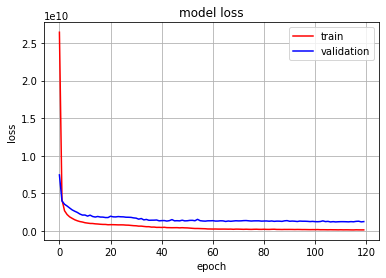

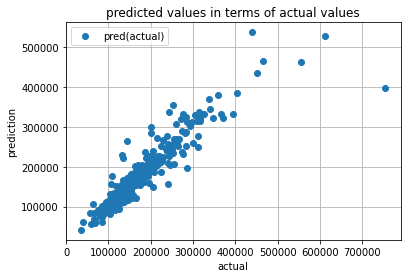

10/10 [==============================] - 0s 2ms/step - loss: 1032122539.6364
loss: 1181424640.0


In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = create_model('mean_squared_error', 1, 'relu', 0.03)
checkpoint = ModelCheckpoint('model_best_weights2rmse.h5', monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min')
s = time.time()
history = model.fit(X_train, y_train, epochs=120, batch_size=16, validation_data = (X_test,y_test),
                    callbacks=[checkpoint])
print('fit time:', time.time()-s)
plot_loss(history)
# load weights
model.load_weights("model_best_weights2rmse.h5")
# Compile model (required to make predictions)
opt = Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=opt)
plot_pred_actual(model.predict(X_test), y_test)
print('loss:', model.evaluate(X_test, y_test))

### Q2, compare PCA and autoencoder

In [16]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

def model_base(act, nl, ind=60):
  model = Sequential()
  model.add(Dense(48, activation=act, input_shape=(ind,)))	#Hidden Layer 1
  model.add(Dense(24, activation=act))	#Hidden Layer 2
  for i in range(nl):
    model.add(Dense(12/(i+1), activation=act))	#Hidden Layer 3
  model.add(Dense(2, activation='softmax')) #Last layer with one output per class
  model.summary()

  # Configure the Network
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [17]:
test = pd.read_csv('Q2test.csv')
train = pd.read_csv('Q2train.csv')
val = pd.read_csv('Q2val.csv')

y_test = test['60'].values.reshape(-1,1)
X_test = test.drop(columns=['60'], axis=1)

y_train = train['60'].values.reshape(-1,1)
X_train = train.drop(columns=['60'], axis=1)

y_val = val['60'].values.reshape(-1,1)
X_val = val.drop(columns=['60'], axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

X_train = ss.fit_transform(X_train)
X_val = ss.fit_transform(X_val)
X_test = ss.fit_transform(X_test)

In [19]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test_copy = y_test.copy()
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

#### PCA

In [20]:
def vis_list(a, t, y, x):
  plt.plot(np.array(range(len(a)))+1,a)
  plt.title(t)
  plt.ylabel(y)
  plt.xlabel(x)
  plt.grid()
  plt.show()

In [21]:
def plot_metrics(history, title):
  # Plotting Metrics
  # Plot the Accuracy Curves
  fig = plt.figure()
  plt.plot(history.history['accuracy'],'r')
  plt.plot(history.history['val_accuracy'],'b')
  plt.title('model accuracy '+str(title))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='lower right')
  plt.grid()

  # Plot the Loss Curves
  fig = plt.figure()
  plt.plot(history.history['loss'],'r')
  plt.plot(history.history['val_loss'],'b')
  plt.title('model loss '+str(title))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.grid()

In [22]:
from keras.callbacks import ModelCheckpoint
import time

def fit_model(model, X_train, y_train, X_val, y_val, name, v, bsize=32, title=''):
  checkpoint = ModelCheckpoint(name, monitor='val_loss', verbose=v,
                              save_best_only=True, mode='min')
  s = time.time()
  history = model.fit(X_train, y_train, epochs=200, batch_size=bsize, validation_data=(X_val, y_val),
                      verbose=v, callbacks=[checkpoint])
  print('fit time:', time.time()-s)
  plot_metrics(history, title)
  return model

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def eval_model(model, X_test, y_test, weights_name, title=''):
  # load weights
  model.load_weights(weights_name)
  # Compile model (required to make predictions)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Prediction Labels
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)

  # Evaluate the trained model
  [test_loss, test_acc] = model.evaluate(X_test, y_test)
  print("Test Loss", test_loss)
  print("Test Accuracy", test_acc)
  # Confusion Matrix
  class_names=['M','R']
  confusion_mtx = confusion_matrix(y_test_copy, y_pred)
      
  plot_confusion_matrix(confusion_mtx, class_names, title='Confusion matrix '+str(title))    

  print(classification_report(y_test_copy,y_pred))
  print('f1', f1_score(y_test_copy, y_pred, average='macro'))
  print('precision', precision_score(y_test_copy, y_pred, average='macro'))
  print('recall', recall_score(y_test_copy, y_pred, average='macro'))
  print('accuracy', accuracy_score(y_test_copy, y_pred))

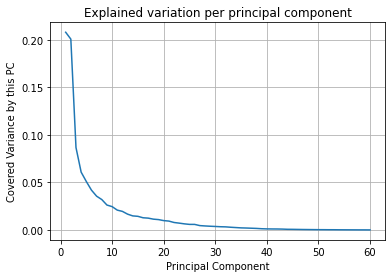

[3.39086774e-03 3.25423888e-03 2.84453793e-03 2.51820737e-03
 2.18654240e-03 2.02770497e-03 1.82534943e-03 1.62038620e-03
 1.28738712e-03 1.11554448e-03 1.04161241e-03 1.00907137e-03
 9.01681362e-04 6.98362085e-04 6.53918747e-04 5.60285465e-04
 4.80396904e-04 4.17093276e-04 3.64674916e-04 3.02002328e-04
 2.86863875e-04 2.40483777e-04 2.31999946e-04 1.77411982e-04
 1.51394108e-04 1.25459852e-04 1.05774112e-04 8.17174617e-05
 7.49584167e-05 4.14402187e-05]


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)
principalComponents = pca.fit_transform(X_train)

vis_list(pca.explained_variance_ratio_,\
         "Explained variation per principal component",\
         'Covered Variance by this PC', 'Principal Component')
print(pca.explained_variance_ratio_[30:])

component number = 40

without dimensionality reduction

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 48)                2928      
_________________________________________________________________
dense_55 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_56 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 26        
Total params: 4,430
Trainable params: 4,430
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 1s 253ms/step - loss: 0.8653 - accuracy: 0.4903 - val_loss: 0.8162 - val_accuracy: 0.5349

Epoch 00001: val_loss improved from inf to 0.81616, saving model to model_best_weightss64b.h5
Epoch 2/200
2

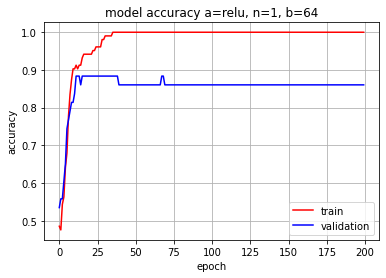

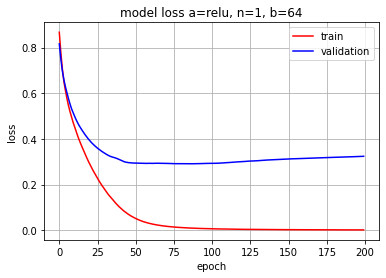

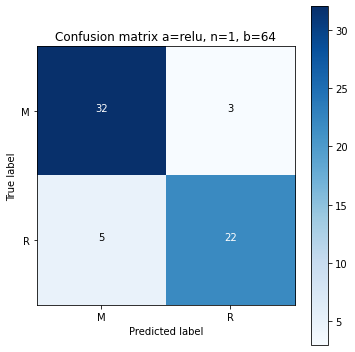

In [38]:
model = model_base('relu', 1)
model = fit_model(model, X_train, y_train, X_val, y_val, "model_best_weightss64b.h5", v=1, bsize=64, title='a=relu, n=1, b=64')
eval_model(model, X_test, y_test, "model_best_weightss64b.h5", 'a=relu, n=1, b=64')

In [65]:
s = time.time()
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print('PCA time:', time.time()-s)

PCA time: 0.014031410217285156


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 48)                1968      
_________________________________________________________________
dense_163 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_164 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_165 (Dense)            (None, 2)                 26        
Total params: 3,470
Trainable params: 3,470
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 1s 282ms/step - loss: 0.7766 - accuracy: 0.4824 - val_loss: 0.7085 - val_accuracy: 0.5814

Epoch 00001: val_loss improved from inf to 0.70847, saving model to model_best_weightss128.h5
Epoch 2/200
2

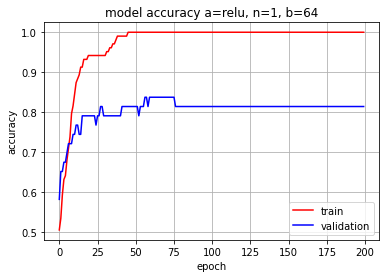

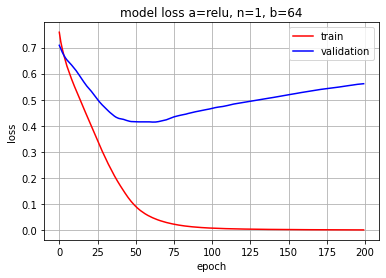

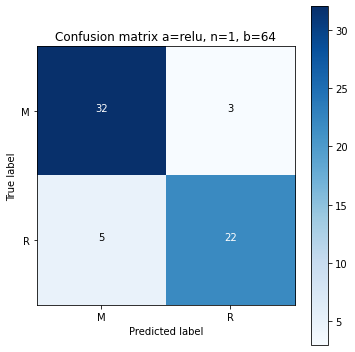

In [68]:
model = model_base('relu', 1, ind=40)
model = fit_model(model, X_train_pca, y_train, X_val_pca, y_val, "model_best_weightss128.h5", v=1, bsize=64, title='a=relu, n=1, b=64')
eval_model(model, X_test_pca, y_test, "model_best_weightss128.h5", 'a=relu, n=1, b=64')

#### autoencoder

Epoch 1/200
4/4 - 1s - loss: 1.0333 - val_loss: 0.9906
Epoch 2/200
4/4 - 0s - loss: 0.9630 - val_loss: 0.9477
Epoch 3/200
4/4 - 0s - loss: 0.9177 - val_loss: 0.9114
Epoch 4/200
4/4 - 0s - loss: 0.8738 - val_loss: 0.8739
Epoch 5/200
4/4 - 0s - loss: 0.8288 - val_loss: 0.8379
Epoch 6/200
4/4 - 0s - loss: 0.7826 - val_loss: 0.8013
Epoch 7/200
4/4 - 0s - loss: 0.7366 - val_loss: 0.7634
Epoch 8/200
4/4 - 0s - loss: 0.6892 - val_loss: 0.7272
Epoch 9/200
4/4 - 0s - loss: 0.6435 - val_loss: 0.6938
Epoch 10/200
4/4 - 0s - loss: 0.6035 - val_loss: 0.6646
Epoch 11/200
4/4 - 0s - loss: 0.5668 - val_loss: 0.6390
Epoch 12/200
4/4 - 0s - loss: 0.5371 - val_loss: 0.6171
Epoch 13/200
4/4 - 0s - loss: 0.5099 - val_loss: 0.5980
Epoch 14/200
4/4 - 0s - loss: 0.4875 - val_loss: 0.5826
Epoch 15/200
4/4 - 0s - loss: 0.4685 - val_loss: 0.5711
Epoch 16/200
4/4 - 0s - loss: 0.4519 - val_loss: 0.5611
Epoch 17/200
4/4 - 0s - loss: 0.4359 - val_loss: 0.5511
Epoch 18/200
4/4 - 0s - loss: 0.4214 - val_loss: 0.5421
E

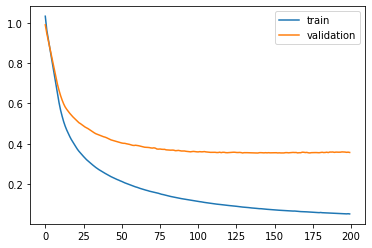

In [62]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.utils import plot_model
# from matplotlib import pyplot

n_inputs = 60
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*0.9)(visible)
# e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(round(n_inputs*0.9*0.9)+1)(e)
# e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = 40
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(round(n_inputs*0.9*0.9)+1)(bottleneck)
# d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*0.9)(d)
# d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
# plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
s = time.time()
history = model.fit(X_train, X_train, epochs=200, batch_size=32, verbose=2, validation_data=(X_val,X_val))
print('fit autoencoder time:',time.time()-s)
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
# plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [63]:
X_train_encode = encoder.predict(X_train)
X_val_encode = encoder.predict(X_val)
X_test_encode = encoder.predict(X_test)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 48)                1968      
_________________________________________________________________
dense_151 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_152 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_153 (Dense)            (None, 2)                 26        
Total params: 3,470
Trainable params: 3,470
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 1s 255ms/step - loss: 0.7999 - accuracy: 0.4759 - val_loss: 0.7729 - val_accuracy: 0.5349

Epoch 00001: val_loss improved from inf to 0.77291, saving model to model_best_weightss128.h5
Epoch 2/200
2

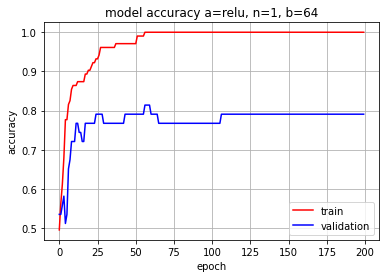

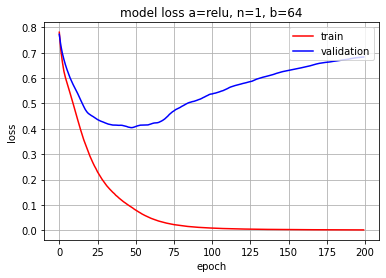

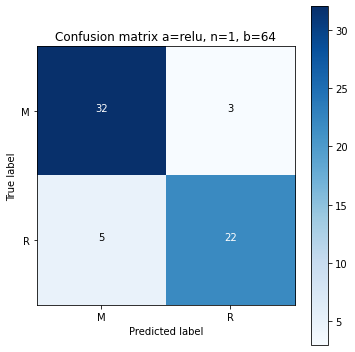

In [64]:
model = model_base('relu', 1, ind=40)
model = fit_model(model, X_train_encode, y_train, X_val_encode, y_val, "model_best_weightss128.h5", v=1, bsize=64, title='a=relu, n=1, b=64')
eval_model(model, X_test_encode, y_test, "model_best_weightss128.h5", 'a=relu, n=1, b=64')